In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as m 
import warnings
warnings.simplefilter(action='ignore')


In [142]:
df=pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [143]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [145]:
corr=df.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

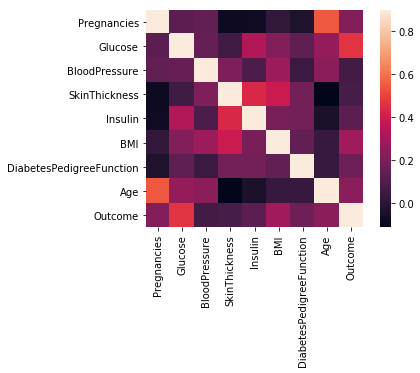

In [146]:
sns.heatmap(corr,mask=None,vmax=0.9,square=True)

In [147]:
#I=df.iloc[:,[1,2]]
I=df[['Glucose','BloodPressure']]
I.head()

Glucose  BloodPressure
0      148             72
1       85             66
2      183             64
3       89             66
4      137             40

In [148]:
#O=df.loc[:,['BMI']]
O=df['BMI']
O.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [149]:
df.size

6912

In [150]:
df.shape

(768, 9)

In [151]:
l1=m.LogisticRegression().fit(df.loc[:,['Glucose','BloodPressure']],df.loc[:,'Outcome'])
l1.score(df.loc[:,['Glucose','BloodPressure']],df.loc[:,'Outcome'])

0.75

In [152]:
df['pre_Outcome']=l1.predict(df.loc[:,['Glucose','BloodPressure']])
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  pre_Outcome  
0                     0.627   50        1            1  
1                     0.351   31        0            0  
2                     0.672   32        1            1  
3                     0.167   21        0            0  
4                     2.288   33        1            0

In [153]:
x=df.groupby(['Outcome','pre_Outcome'])['pre_Outcome'].count()
x



Outcome  pre_Outcome
0        0              448
         1               52
1        0              140
         1              128
Name: pre_Outcome, dtype: int64

In [10]:
x.values

array([448,  52, 140, 128], dtype=int64)

In [11]:
x=df.groupby(['Outcome','pre_Outcome'])['pre_Outcome'].count()/768 *100
x

Outcome  pre_Outcome
0        0              58.333333
         1               6.770833
1        0              18.229167
         1              16.666667
Name: pre_Outcome, dtype: float64

In [94]:
x.values

array([58.33333333,  6.77083333, 18.22916667, 16.66666667])

In [154]:
x=df.groupby(['Outcome','pre_Outcome'])['pre_Outcome'].count()
x

Outcome  pre_Outcome
0        0              448
         1               52
1        0              140
         1              128
Name: pre_Outcome, dtype: int64

In [155]:
tot=x[0][0]+x[0][1]+x[1][0]+x[1][1]
tot

768

In [15]:
r_p=x[0][0]+x[1][1]
r_p

576

In [16]:
w_p=x[0][1]+x[1][0]
w_p

192

In [17]:
r2_score=(r_p/tot)*100 # determination coef
r2_score

75.0

In [18]:
errors=df['Outcome']!= df['pre_Outcome']
errors.head()


0    False
1    False
2    False
3    False
4     True
dtype: bool

In [19]:
errors.sum()

192

In [20]:
errors_rate=errors.sum()/len(df['pre_Outcome'])
errors_rate

0.25

In [21]:
df['pre_Outcome'].value_counts()

0    588
1    180
Name: pre_Outcome, dtype: int64

In [97]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

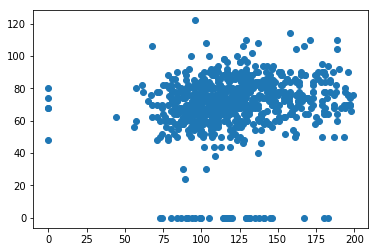

In [156]:
plt.scatter(df['Glucose'],df['BloodPressure'])

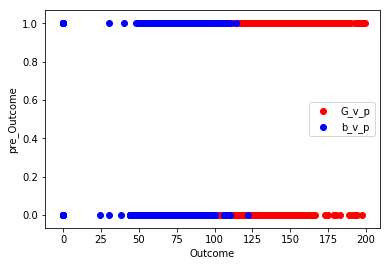

In [157]:
plt.scatter(df['Glucose'],df['Outcome'],label='G_v_p',color='r')
plt.scatter(df['BloodPressure'],df['Outcome'],label='b_v_p',color='B')
plt.xlabel('Outcome')
plt.ylabel('pre_Outcome')
plt.legend()
plt.show()

In [158]:
l1.coef_

array([[ 0.03319459, -0.00593138]])

In [159]:
l1.intercept_

array([-4.3153104])

In [160]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
pre_Outcome                   int64
dtype: object

In [161]:
df['Glucose']=df.Glucose.astype(float)
df['BloodPressure']=df.BloodPressure.astype(float)

In [179]:
lreg=m.LinearRegression().fit(df[['Glucose','BloodPressure']],df['Outcome'])
lreg.score(df[['Glucose','BloodPressure']],df['Outcome'])


0.21773663757400807

In [180]:
linear=lreg.predict(df[['Glucose','BloodPressure']])

In [181]:
#xx1=[]
x11=linear
#print(x11)
lsexp=[]
for i in range(len(x11)):
   # print(linear_data[i])
    lsexp.append(abs(1/1-math.exp(x11[i])))
print(lsexp)

[0.7118217081178437, 0.10416763793441852, 1.1878130477777824, 0.13540543950186512, 0.593264555647308, 0.3689784575163775, 0.05415922413425811, 0.3751036713093241, 1.4099790044974534, 0.45271558989102, 0.3092250064943638, 0.9674515462808726, 0.6056857998853926, 1.2827201534572321, 0.940797985286389, 0.23851310287571126, 0.3860639419361356, 0.28568836126263286, 0.2588488661863919, 0.3603045653703725, 0.4646931400457093, 0.21403853888016644, 1.3858416555198656, 0.3966281307605881, 0.6475426488902305, 0.45856586762061635, 0.6988733739406527, 0.20055727296839088, 0.6737871745065758, 0.37472938323011995, 0.30354659015419827, 0.8343402240698115, 0.12890927896844007, 0.1547620122848934, 0.42659933692284313, 0.2530246462195678, 0.5955121222996655, 0.24124211259351336, 0.14299858898733397, 0.3224703200711585, 1.1425118906143656, 0.5389272917665089, 0.27320500030348915, 0.9979022550254439, 0.850608150107028, 1.141849619783447, 0.6922895547065715, 0.0008307415442214694, 0.25186303980088676, 0.2824

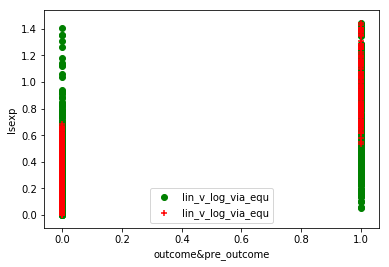

In [186]:
plt.scatter(df['Outcome'],lsexp,label='lin_v_log_via_equ',color='g',marker='o')
plt.scatter(df['pre_Outcome'],lsexp,label='lin_v_log_via_equ',color='r',marker='+')
plt.xlabel('outcome&pre_outcome')
plt.ylabel('lsexp')
plt.legend()
plt.show()

In [29]:
df1=pd.read_excel('ENB2012_data.xlsx')
df1.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [44]:
corr=df1.corr()
corr

X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
X7  1.283986e-17  1.318356e-16 -7.969726e-19 -1.381805e-16  1.861418e-18   
X8  1.764620e-17 -3.558613e-16  0.000000e+00 -1.079129e-16  0.000000e+00   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

          X6            X7            X8        Y1        Y2  
X1  0.000000  1.283986e-17  1.764620e-17  0.622272  0.634339  
X2  0.000000  1.318356e-16 -3.558613e-16 -0.658120 -0.672999  
X3  0.000000 -7.969726e-19  0.000000e+00  0.455671  0.427117  
X4  0.000000 -1.381805e-16 -1.079129e-16 -0.861828 -0.862547  
X5  0.000000  1.861418e-18  0.000000e+00  0.889430  0.895785  
X6  1.000000  0.000000e+00  0.000000e+00 -0.002587  0.014290  
X7  0.000000  1.000000e+00  2.129642e-01  0.269842  0.207505  
X8  0.000000  2.129642e-01  1.000000e+00  0.087368  0.050525  
Y1 -0.002587  2.698417e-01  8.736846e-02  1.000000  0.975862  
Y2  0.014290  2.075050e-01  5.052512e-02  0.975862  1.000000

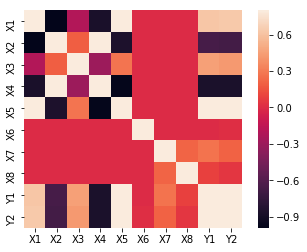

In [47]:
import seaborn as sns
sns.heatmap(corr, mask=None, vmax=.8, square=True)

In [104]:
df1.corr()['Y1'].sort_values()

X4       -0.861828
error    -0.736593
X2       -0.658120
SSE      -0.646493
X6       -0.002587
X8        0.087368
X7        0.269842
X3        0.455671
X1        0.622272
X5        0.889430
Y2        0.975862
pre_Y3    0.996792
Y1        1.000000
Name: Y1, dtype: float64

In [52]:
df1.sum()

X1       586.880
X2    515872.000
X3    244608.000
X4    135632.000
X5      4032.000
X6      2688.000
X7       180.000
X8      2160.000
Y1     17131.926
Y2     18883.400
dtype: float64

In [88]:
l2=m.LinearRegression().fit(df1.iloc[:,:-2],df1.iloc[:,-2])
l2.score(df1.iloc[:,:-2],df1.iloc[:,-2])


0.9585866119194412

In [94]:

dfinput=df.iloc[:,:-2]
dfoutput=df.iloc[:,-2]


In [95]:
df1.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2     pre_Y3
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33  19.666296
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33  19.808454
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33  19.950611
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33  20.092768
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28  24.597216

In [97]:
df1['error']=df1['pre_Y3']-df1['Y1']
df1.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2     pre_Y3  \
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33  19.666296   
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33  19.808454   
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33  19.950611   
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33  20.092768   
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28  24.597216   

      error  
0  4.116296  
1  4.258454  
2  4.400611  
3  4.542768  
4  3.757216

In [100]:
df1['SSE']=df1['error']*df1['error']
df1.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2     pre_Y3  \
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33  19.666296   
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33  19.808454   
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33  19.950611   
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33  20.092768   
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28  24.597216   

      error        SSE  
0  4.116296  16.943894  
1  4.258454  18.134426  
2  4.400611  19.365376  
3  4.542768  20.636743  
4  3.757216  14.116670

In [101]:
df1.sum()

X1           586.880000
X2        515872.000000
X3        244608.000000
X4        135632.000000
X5          4032.000000
X6          2688.000000
X7           180.000000
X8          2160.000000
Y1         17131.926000
Y2         18883.400000
pre_Y3     18880.731704
error       1748.805704
SSE         4912.963439
dtype: float64

In [102]:
df1.mean()

X1          0.764167
X2        671.708333
X3        318.500000
X4        176.604167
X5          5.250000
X6          3.500000
X7          0.234375
X8          2.812500
Y1         22.307195
Y2         24.587760
pre_Y3     24.584286
error       2.277091
SSE         6.397088
dtype: float64

In [105]:
df1.corr()['Y2'].sort_values()

X4       -0.862547
X2       -0.672999
error    -0.665208
SSE      -0.573713
X6        0.014290
X8        0.050525
X7        0.207505
X3        0.427117
X1        0.634339
X5        0.895785
Y1        0.975862
pre_Y3    0.979075
Y2        1.000000
Name: Y2, dtype: float64

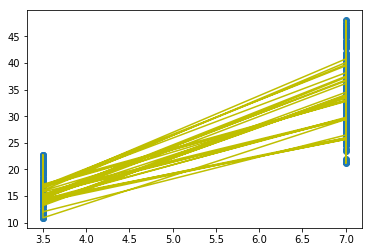

In [108]:
plt.scatter(df1['X5'],df1['Y2'])
plt.plot(df1['X5'],df1['Y2'],color='y')